<a href="https://colab.research.google.com/github/lazypnkj/AIML-projects/blob/main/Computer_vision_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part A

**• DOMAIN:** Entertainment

**• CONTEXT:** Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and
multimedia experts who need to detect faces from screen shots from the movie scene. The data labelling is already done. Since there higher time complexity is involved in the

**• DATA DESCRIPTION:** The dataset comprises of images and its mask for corresponding human face.

**• PROJECT OBJECTIVE:** To build a face detection system.
Steps and tasks:

**1. Import and Understand the data**

A. Import and read ‘images.npy’

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras

In [ ]:
img_path = "/content/drive/MyDrive/AIML/CV2/images.npy"
img_data = np.load(img_path, allow_pickle=True)

In [ ]:
img_data.shape

(409, 2)

In [ ]:
img_data[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



In [ ]:
img_data[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [ ]:
img_data[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

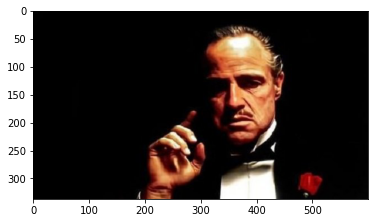

In [ ]:
plt.imshow(img_data[10][0])

B. Split the data into Features(X) & labels(Y). Unify shape of all the images.

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input

img_height = 224
img_width = 224

y = np.zeros((int(img_data.shape[0]), img_height, img_width))
X = np.zeros((int(img_data.shape[0]),img_height, img_width,3))


for index in range(img_data.shape[0]):
  img = img_data[index][0]
  img = cv2.resize(img, dsize=(img_height, img_width), interpolation=cv2.INTER_CUBIC)

  try:
    img = img[:,:,:3]
  except:
    continue

  X[index] = preprocess_input(np.array(img, dtype=np.float32))

  for i in img_data[index][1]:
    x1 = int(i["points"][0]['x'] * img_width)
    x2 = int(i["points"][1]['x'] * img_width)
    y1 = int(i["points"][0]['y'] * img_height)
    y2 = int(i["points"][1]['y'] * img_height)

    y[index][y1:y2, x1:x2] = 1

print(X.shape, y.shape)

(409, 224, 224, 3) (409, 224, 224)


C. Split the data into train and test[400:9]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.02)

print(X_train.shape, X_test.shape)

(400, 224, 224, 3) (9, 224, 224, 3)


D. Select random image from the train data and display original image and masked image.

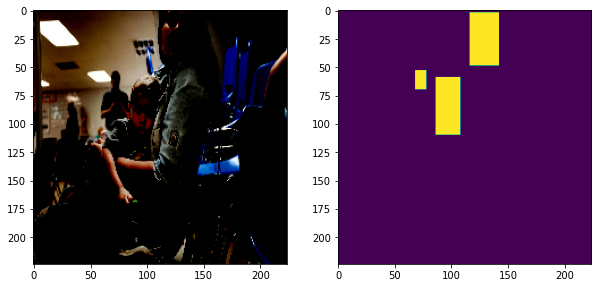

In [ ]:
import random 

n = 3
fig = plt.figure(figsize=(10, 10))
a = fig.add_subplot(1, 2, 1)
plt.imshow(X_train[n])
a = fig.add_subplot(1, 2, 2)
plt.imshow(y_train[n])

# 2. Model building:

**A. Design a face mask detection model.**

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D
from keras.models import Model

img_height = 224
img_width = 224
ALPHA = 1

def create_model(trainable=False):
    model = MobileNet(input_shape=(img_height, img_width, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
      layer.trainable = trainable

    block0 = model.layers[0].input
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_2_relu").output
    block3 = model.get_layer("conv_pw_3_relu").output
    block5 = model.get_layer("conv_pw_5_relu").output
    block11 = model.get_layer("conv_pw_11_relu").output
    block13 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block13), block11])
    x = Concatenate()([UpSampling2D()(x), block5])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((img_height, img_width))(x)

    return Model(inputs=model.input, outputs=x) 

In [ ]:
model = create_model()

# Print summary
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                             

B. Design your own Dice Coefficient and Loss function

Dice Coefficient

In [ ]:
from keras.backend import epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

Loss function

In [ ]:
from keras.losses import binary_crossentropy
from keras.backend import log

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

C. Train and tune the model as required.

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss=loss, optimizer = optimizer, metrics=[dice_coefficient])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
]

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs = 10,verbose=1,
          batch_size=3,callbacks=callbacks)

Epoch 1/10
134/134 [==============================] - 25s 113ms/step - loss: 1.1234 - dice_coefficient: 0.4795 - val_loss: 0.9503 - val_dice_coefficient: 0.5387 - lr: 0.0010
Epoch 2/10
134/134 [==============================] - 14s 108ms/step - loss: 0.7772 - dice_coefficient: 0.5979 - val_loss: 0.9931 - val_dice_coefficient: 0.5410 - lr: 0.0010
Epoch 3/10
134/134 [==============================] - 15s 109ms/step - loss: 0.7361 - dice_coefficient: 0.6133 - val_loss: 0.9445 - val_dice_coefficient: 0.5614 - lr: 0.0010
Epoch 4/10
134/134 [==============================] - 15s 109ms/step - loss: 0.7110 - dice_coefficient: 0.6251 - val_loss: 0.8255 - val_dice_coefficient: 0.5981 - lr: 0.0010
Epoch 5/10
134/134 [==============================] - 15s 108ms/step - loss: 0.6933 - dice_coefficient: 0.6363 - val_loss: 0.8157 - val_dice_coefficient: 0.6052 - lr: 0.0010
Epoch 6/10
134/134 [==============================] - 15s 109ms/step - loss: 0.6814 - dice_coefficient: 0.6397 - val_loss: 0.8034 

D. Evaluate and share insights on performance of the model

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.7110 - dice_coefficient: 0.6425


[0.7109798789024353, 0.6425427794456482]

The dice coefficient is above 50% i.e 0.64215 on training and 0.6160 on test/validation which is decent for predictions

## 3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image

In [ ]:
test_image = X_test[3]
resized_image = cv2.resize(test_image, (img_height, img_width))

In [ ]:
prediction = model.predict(np.array([resized_image]))
prediction

1/1 [==============================] - 0s 415ms/step


array([[[3.1102206e-06, 3.1098173e-06, 2.9737175e-06, ...,
         8.2513750e-08, 8.6802181e-08, 8.6419412e-08],
        [3.1121106e-06, 3.1121581e-06, 2.9825958e-06, ...,
         8.2509814e-08, 8.6766917e-08, 8.6481911e-08],
        [5.9865311e-06, 5.9985900e-06, 1.4139638e-05, ...,
         3.0136479e-07, 8.3696214e-08, 8.3559193e-08],
        ...,
        [2.2073214e-09, 2.2072539e-09, 3.4142502e-09, ...,
         1.5137010e-06, 4.0406786e-07, 4.0329328e-07],
        [2.3105233e-09, 2.3073878e-09, 9.4167085e-10, ...,
         4.3110086e-07, 3.9339838e-07, 3.9399006e-07],
        [2.3067057e-09, 2.3066353e-09, 9.3936037e-10, ...,
         4.3164391e-07, 3.9393936e-07, 3.9421749e-07]]], dtype=float32)

In [ ]:
predicted_mask = cv2.resize((1.0*(prediction[0] > 0.5)), (224,224))

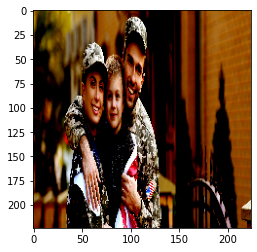

In [ ]:
plt.imshow(test_image)

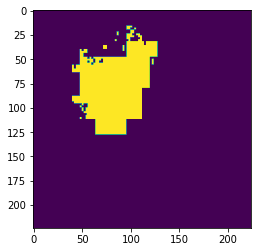

In [ ]:
plt.imshow(predicted_mask)

The model has detected the faces in the image correctly

*******************************

## Part B

**• CONTEXT:** Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. 

Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer
vision and multimedia experts who need to detect faces from screen shots from the movie scene.

The data labelling is already done. Since there higher time complexity is involved in the

**• DATA DESCRIPTION:** The dataset comprises of face images.

**• PROJECT OBJECTIVE:** To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given

**Steps and tasks:**

1. Read/import images from folder ‘training_images’. 

In [ ]:
from zipfile import ZipFile
import os
import numpy as np
import cv2
import tensorflow as tf

image_path = "/content/drive/MyDrive/training_images.zip"

with ZipFile(image_path, 'r') as z:
  z.extractall()

In [ ]:
img_loc = z.filelist[0].filename.split("/")[0] 
img_loc

'training_images'

In [ ]:
image_names = [os.path.join(img_loc,i) for i in os.listdir(img_loc)]

image_list = []
for imgs in image_names:
  img = cv2.imread(imgs)
  image_list.append(img)
image_list = np.array(image_list)
print(image_list.shape)

(1091, 600, 600, 3)


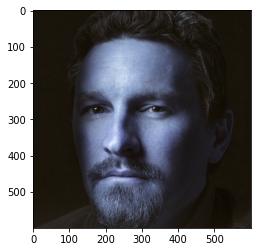

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_list[50]) # checking random image to see if read properly

Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2023-01-19 16:10:23--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-01-19 16:10:24 (17.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



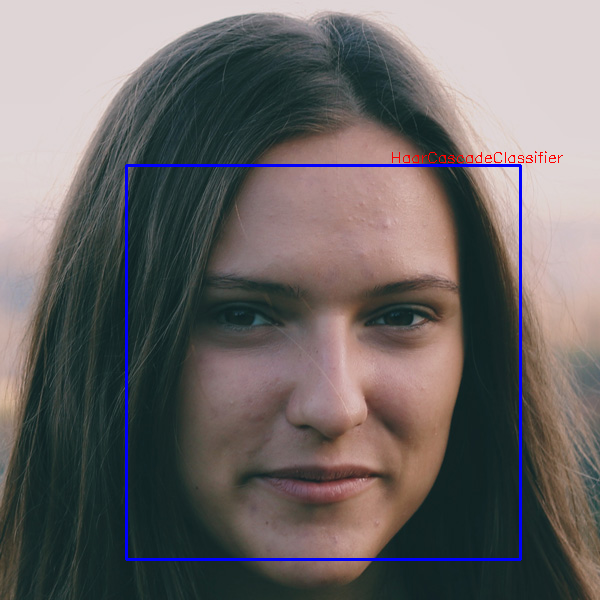

In [ ]:
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for imgs in image_list:
  gray = cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,1.1,45)

  for (x, y, w, h) in faces:
    cv2.rectangle(imgs, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(imgs, "HaarCascadeClassifier", (int((x+w)*0.75),y-3),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255))  
        
cv2_imshow(img)        

3. From the same loop above, extract metadata of the faces and write into a DataFrame

In [ ]:
import pandas as pd

img_metadata = pd.DataFrame(columns=['x','y','w','h','Total_Faces','Image_Name'])

for imgs, fnames in zip(image_list,image_names):
  gray = cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,1.1,4)

  for (x,y,w,h) in faces:
    temp_dict = {'x':x, 
                'y':y, 
                'w':w,
                'h':h, 
                'Total_Faces':len(faces),
                'Image_Name':fnames} 
  img_metadata = img_metadata.append(temp_dict,ignore_index=True)



In [ ]:
img_metadata.head()

,x,y,w,h,Total_Faces,Image_Name
0,91,148,386,386,1,training_images/real_01028.jpg
1,130,165,386,386,1,training_images/real_00294.jpg
2,91,121,414,414,1,training_images/real_00145.jpg
3,43,99,417,417,1,training_images/real_00307.jpg
4,93,192,326,326,1,training_images/real_00276.jpg


In [ ]:
img_metadata['Image_Name'] = img_metadata['Image_Name'].str[-14:]


In [ ]:
img_metadata.head()

,x,y,w,h,Total_Faces,Image_Name
0,91,148,386,386,1,real_01028.jpg
1,130,165,386,386,1,real_00294.jpg
2,91,121,414,414,1,real_00145.jpg
3,43,99,417,417,1,real_00307.jpg
4,93,192,326,326,1,real_00276.jpg


4. Save the output Dataframe in .csv format.

In [ ]:
img_metadata.to_csv('image_metadata.csv')
data = pd.read_csv('image_metadata.csv')
data.head()

,Unnamed: 0,x,y,w,h,Total_Faces,Image_Name
0,0,91,148,386,386,1,real_01028.jpg
1,1,130,165,386,386,1,real_00294.jpg
2,2,91,121,414,414,1,real_00145.jpg
3,3,43,99,417,417,1,real_00307.jpg
4,4,93,192,326,326,1,real_00276.jpg


******************************************

# Part C

**• DOMAIN:** Face Recognition

**• CONTEXT:** Company X intends to build a face identification model to recognise human faces.

**• DATA DESCRIPTION:** The dataset comprises of images and its mask where there is a human face.

**• PROJECT OBJECTIVE:** Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library.

**Steps and tasks:**

1. Unzip, read and Load data(‘PINS.zip’) into session

In [1]:
from zipfile import ZipFile
import os
import numpy as np
import cv2
import tensorflow as tf

image_path = "/content/drive/MyDrive/PINS.zip"

with ZipFile(image_path, 'r') as z:
  z.extractall()

2. Write function to create metadata of the image

In [2]:
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 

3. Write a loop to iterate through each and every image and create metadata for all the images.

In [3]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)
metadata = load_metadata('PINS')

In [4]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [5]:
load_image('/content/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

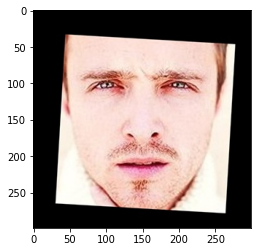

In [6]:
import matplotlib.pyplot as plt

plt.imshow(load_image('/content/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg'))

4. Generate Embeddings vectors on the each face in the dataset

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [8]:
model = vgg_face()
model.load_weights('/content/drive/MyDrive/vgg_face_weights.h5')

In [9]:
model.layers[0], model.layers[-2]

(<keras.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x7f9e2f178d90>,
 <keras.layers.reshaping.flatten.Flatten at 0x7f9e208056d0>)

In [10]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [11]:
img_path = metadata[0].image_path()
img = load_image(img_path)

img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 10s 10s/step
(2622,)


In [12]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.0069938665, numpy.ndarray, numpy.float32)

In [13]:
from tqdm.notebook import tqdm

embeddings = []
embeddings = np.zeros((metadata.shape[0], 2622))
for i, meta in tqdm(enumerate(metadata)):
  try:
    image = load_image(str(meta))
    image = (image/255.).astype(np.float32)
    image = cv2.resize(image, (224, 224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis = 0))[0]
  except:
    embeddings[i] = np.zeros(2622)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step


5. Build distance metrics for identifying the distance between two similar and dissimilar images.

In [14]:
def dist_metric(embed1, embed2):
    return np.sum(np.square(embed1 - embed2))

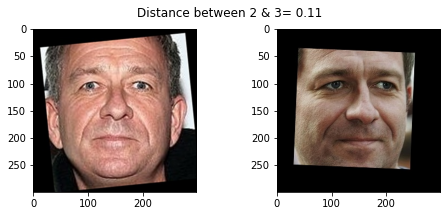

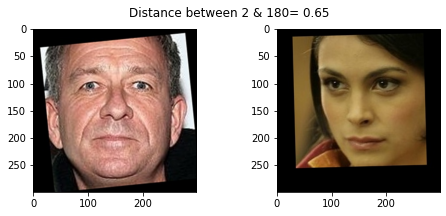

In [16]:
def pair(sample1, sample2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {sample1} & {sample2}= {dist_metric(embeddings[sample1], embeddings[sample2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[sample1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[sample2].image_path()));    

pair(2, 3)
pair(2, 180)


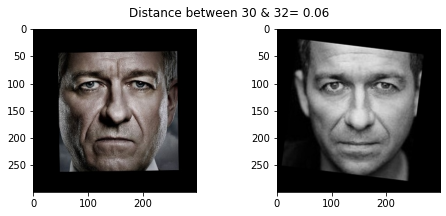

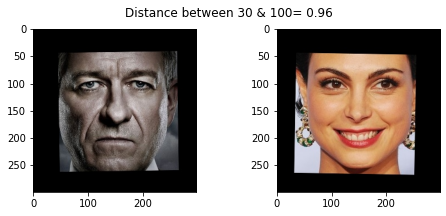

In [19]:
pair(30, 32)
pair(30, 100)

6. Use PCA for dimensionality reduction

In [20]:
#splitting data into train and test
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# Features
X_train = np.array(embeddings)[train_idx]
X_test = np.array(embeddings)[test_idx]

# Labels
y_train = np.array([meta.name for meta in metadata[train_idx]])
y_test = np.array([meta.name for meta in metadata[test_idx]])

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622)

(1197, 2622)

(9573,)

(1197,)

In [21]:
print(X_train[0])
print(X_test[0])
print(y_train[100]) 
print(y_test[0])

[ 0.01803778 -0.0176975   0.01584616 ... -0.02471279 -0.01754982
 -0.01038536]
[ 0.00699387 -0.01277621 -0.00606504 ... -0.01276418 -0.00414456
 -0.01533722]
pins_Morena Baccarin
pins_sean pertwee


In [22]:
#Label encoding for the traget varibale
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)

print(le.classes_)
y_test_le = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

In [23]:
print('y_train_le : ', y_train_le)
print('y_test_le : ', y_test_le)

y_train_le :  [93 93 93 ... 57 57 57]
y_test_le :  [93 93 93 ... 57 57 57]


In [24]:
#scaling/standardizing X train and test

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [25]:
print(X_train_scaled[10])

[-0.7516498  -2.05162633 -1.58942418 ...  0.13387867 -2.00329649
 -1.28692055]


In [26]:
print(X_test_scaled[1])

[-0.65351769 -1.01649412 -0.74532394 ...  1.29403243 -1.19843117
 -1.591729  ]


In [27]:
from sklearn.decomposition import PCA

cov_matrix = np.cov(X_train_scaled.T)

eig_values, eig_vectors = np.linalg.eig(cov_matrix)


total = sum(eig_values)
var_exp = [(i /total) * 100 for i in sorted(eig_values, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 13.52075423  18.93020288  22.91300146 ...  99.99999983  99.99999999
 100.        ]


In [28]:
# Get index where cumulative variance explained is > threshold
thres = 95
res = list(filter(lambda i: i > thres, cum_var_exp))[0]
index = (cum_var_exp.tolist().index(res))
print(f'Index of element just greater than {thres}: {str(index)}')

Index of element just greater than 95: 347


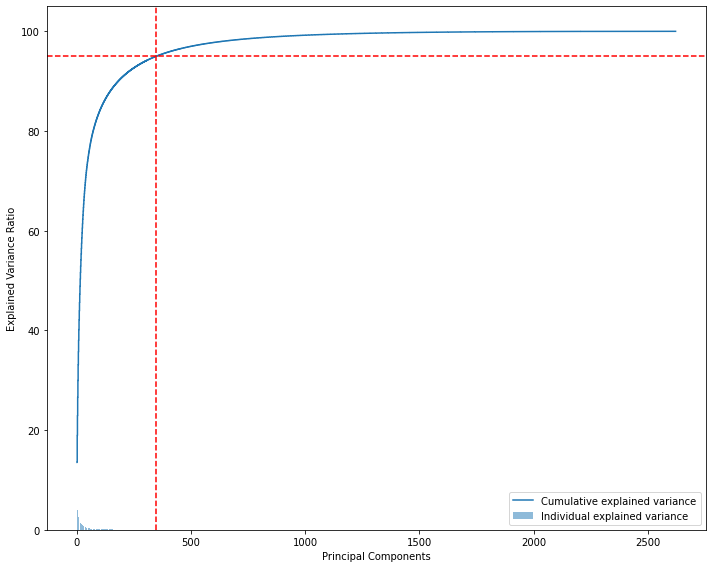

In [30]:
plt.figure(figsize = (10 , 8))
plt.bar(range(1, eig_values.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_values.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = thres, color = 'r', linestyle = '--')
plt.axvline(x = index, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [31]:
pca = PCA(n_components = index, random_state = 1, svd_solver = 'full', whiten = True)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
display(X_train_pca.shape, X_test_pca.shape)

(9573, 347)

(1197, 347)

7. Build an SVM classifier in order to map each image to its right person.

In [35]:
#Hyperparameter tuning to get the best parameters for best model performance and accuracy

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000], 'class_weight': ['balanced', None]}]

svm = GridSearchCV(SVC(random_state = 1), params_grid, cv = 3, scoring = 'f1_macro', verbose = 50, n_jobs = -1)
svm.fit(X_train_pca, y_train_le)

print('Best estimator found by grid search:')
print(svm.best_estimator_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best estimator found by grid search:
SVC(C=10, gamma=0.001, random_state=1)


In [36]:
svc = SVC(C = 10, gamma = 0.001, random_state = 1)
svc.fit(X_train_pca, y_train_le)
print('SVC accuracy for train set: {0:.3f}'.format(svc.score(X_train_pca, y_train_le)))

SVC accuracy for train set: 1.000


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = svc.predict(X_test_pca)

print('Accuracy Score: {}'.format(accuracy_score(y_test_le, y_pred)))

Accuracy Score: 0.9640768588137009


**8. Import and display the the test images.**

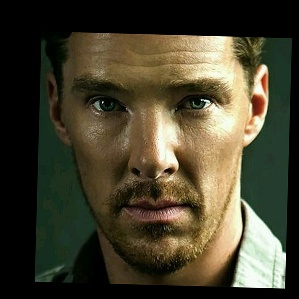

In [48]:
from google.colab.patches import cv2_imshow
img_ben_c = cv2.imread('/content/Benedict Cumberbatch9.jpg')
cv2_imshow(img_ben_c)

**9. Use the trained SVM model to predict the face on both test images.**

In [43]:
#first image 
sample_img = (img_ben_c/255.).astype(np.float32)
sample_img = cv2.resize(sample_img, (224, 224))
embedding = vgg_face_descriptor.predict(np.expand_dims(sample_img, axis = 0))[0]
embedding_scaled = sc.transform(embedding.reshape(1, -1))
sample_pred = svc.predict(pca.transform(embedding_scaled))

1/1 [==============================] - 0s 20ms/step


In [46]:
pred_name = le.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()

In [47]:
pred_name

'Benedict Cumberbatch'

The model has predicted the face correctly as Benedict Cumberbatch

Checking the 2nd test image

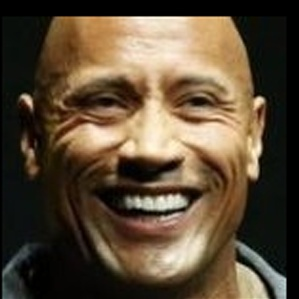

In [49]:
img_rock = cv2.imread('/content/Dwayne Johnson4.jpg')
cv2_imshow(img_rock)

In [50]:
sample_img2 = (img_rock/255.).astype(np.float32)
sample_img2 = cv2.resize(sample_img2, (224, 224))
embedding1 = vgg_face_descriptor.predict(np.expand_dims(sample_img2, axis = 0))[0]
embedding_scaled1 = sc.transform(embedding1.reshape(1, -1))
sample_pred = svc.predict(pca.transform(embedding_scaled1))

1/1 [==============================] - 0s 26ms/step


In [51]:
pred_name1 = le.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()
pred_name1

'Dwayne Johnson'

The model has predicted the face correctly for 2nd test image as well as Dwayne Johnson